# IST 317 Machine Learning

## Spring 2019

### Chapter 3 homework: credit card fraud detection

#### Alex Lange

In this assignment, you will train some classifiers to try to detect a fraudulent transaction, based on several predictors. The dataset is provided, in the file named creditcard.csv. Each row represents a transaction, with 28 predictors, the amount of the transaction, and a class: 0 for suspected fraud, 1 for a good transaction.

In [18]:
# Load the file into a Pandas dataframe and display the frame
# Import Pandas
import pandas as pds

%matplotlib inline

#Load in our Data
cardinfo = pds.read_csv(r'C:\Users\Me\Desktop\credit-card\creditcard.csv')  

#Show some header data
cardinfo.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [19]:
# look at the frame's metadata to see the types of the columns, 
# and if there is any missing data

#check the metadata wish .info()
cardinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [20]:
#It looks like there isn't any missing data, because there's 284,807 pieces to each column, so they should all be non-null.

# examine the characteristics of the numerical data
# we can check out characteristics using the .describe() method
cardinfo.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


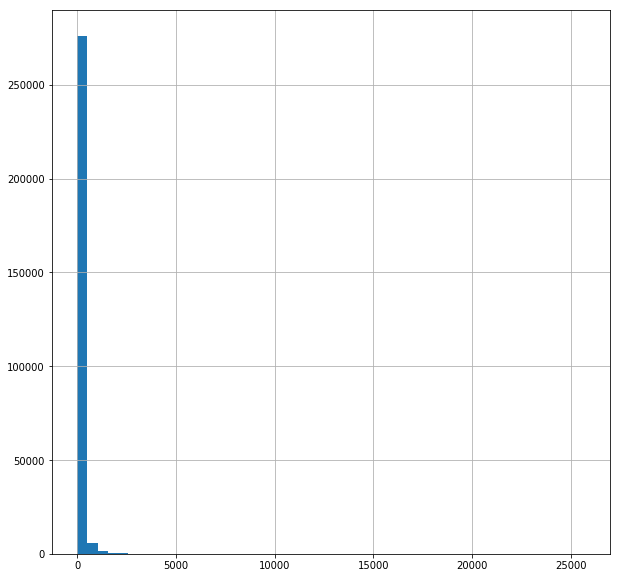

In [21]:
# create a histogram of the Amount class
import matplotlib.pyplot as plt
#We are going to cut down our histogram is it's easier to read

#Create our histogram
cardinfo['Amount'].hist(bins=50, figsize=(10, 10))
plt.show()


# About that histogram

What does the histogram tell you about how the Amount feature is distributed? What, if anything, should you do to the data, based on the histogram? Edit this Markdown cell and type your answer here:

There is a very large distribution of data that goes out super far in the above histogram, so we will need to make it easier for us to understand, which are split based on the size of transactions.




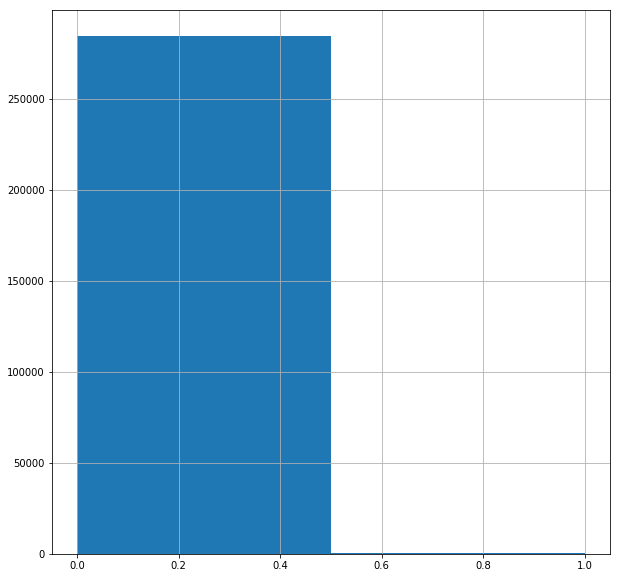

In [22]:
# Now, create a histogram of the Class field 

# The Class field is either 0 or 1, so we only need two buckets for this histogram
cardinfo['Class'].hist(bins=2, figsize=(10, 10))
    
plt.show()


In [23]:
# Now, look at the value_counts() for the Class feature, to gain further insight
# We will look at the counts by using the .value_counts() method.
cardinfo['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

# About *that* histogram and data

What does the histogram of the labels tell you? Write your answer here:

That histogram shows us that there tends to be a large number of small purchases, and a small number of large puurchases.




# Split and prepare the data

In the following cells, split the data into test and training data, and perform any preprocessing before training ML models. 


In [24]:
# split data into training and testing sets, and then examine the
# value_counts() for the training and testing sets, to make sure
# each set is representative of the whole dataset

#I had tried using a stratifiedShuffleSplit earlier, and then switched to that split using the colons and brackets, but I
#Still don't quite understand that one. So I sort of tried stwitching between the two, but could never figure it out.
#Mark told me and wrote that the StratifiedShuffleSplit is the correct option here.

#Import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit

#Use the StratifiedShuffleSplit to create a training and a testing set.
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 68333)
for train_index, test_index in split.split(cardinfo, cardinfo['Class']):
    train_set = cardinfo.loc[train_index]
    test_set = cardinfo.loc[test_index]
    
print(train_set['Class'].value_counts())
print(test_set['Class'].value_counts())

0    227451
1       394
Name: Class, dtype: int64
0    56864
1       98
Name: Class, dtype: int64


In [25]:
# separate the predictors from the labels in the training set
X_train = train_set.drop('Class', axis = 1)
y_train = train_set['Class'].copy()



In [26]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
92928,64175.0,-0.912847,0.772598,1.849758,0.107021,-0.147144,-0.598941,0.932336,-0.042463,-0.368649,...,0.323219,-0.180380,-0.493755,-0.056591,0.395133,0.387628,0.259883,0.230133,0.132005,74.98
221818,142714.0,-3.591515,3.910352,-2.891685,-1.918493,0.217416,-1.266242,0.750557,0.725794,1.361856,...,1.476130,0.015737,0.753112,0.052252,0.716572,0.398850,0.099106,1.501519,0.926509,1.52
62862,50460.0,-1.670953,0.334150,1.056679,1.471068,0.281047,-0.098972,0.660934,-0.037138,0.163878,...,-0.228314,-0.208891,0.281223,0.261983,0.104848,0.061703,-0.208386,0.457542,0.278170,85.00
247199,153498.0,0.546966,0.913063,-0.459902,1.160963,0.646706,-0.455869,0.528122,-0.119225,-0.339443,...,0.174593,-0.182458,-0.376045,0.281319,0.575739,-1.725004,0.410521,0.286010,0.310566,1.78
201926,134094.0,0.339059,-0.454480,1.691705,-1.077043,-1.065307,-0.245194,-0.451220,-0.113384,-0.249707,...,-0.339019,-0.046677,0.514036,0.203888,-0.032998,-1.369265,0.519218,-0.007121,-0.090428,35.90
165979,117779.0,-0.409495,1.718588,-1.256791,-0.425204,0.418727,0.260902,-1.013487,-4.926405,0.353828,...,-1.050305,4.204241,-2.598692,0.651835,0.450313,0.681440,0.248922,0.184640,0.139244,8.07
173136,121364.0,1.790337,-0.958565,-0.476041,-0.559839,-0.926704,-0.512524,-0.530806,-0.111749,1.539557,...,0.150010,0.262231,0.787079,0.131237,1.208105,-0.338824,0.666993,-0.044693,-0.019795,122.00
270231,163980.0,1.934325,0.570934,-0.929288,3.449339,0.938204,0.673647,0.142259,0.113489,-1.208076,...,-0.248855,-0.264794,-0.824752,0.316840,0.109333,-0.197789,-0.362904,-0.046000,-0.051927,2.99
144246,85969.0,-0.378084,1.137864,1.282005,0.004316,0.272431,-0.499746,0.672738,0.030084,-0.492977,...,0.116801,-0.230392,-0.523231,0.001918,0.040164,-0.213293,0.099536,0.267025,0.096008,1.29
6690,8310.0,1.146985,0.529827,1.025658,2.948971,-0.238422,-0.081878,-0.105227,-0.122310,1.007404,...,-0.171262,-0.220031,-0.184090,-0.079841,0.365562,0.617718,0.036123,-0.016001,0.016370,11.39


In [27]:
# create transformation pipleline(s) to prepare the training data for use in 
# a ML algorithm

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

X_train = num_pipeline.fit_transform(X_train)

# Train a classifier on the data

In the cell below, train a SGD classifier to detect credit card fraud.


In [28]:
# create and train the SGD classifier

from sklearn.linear_model import SGDClassifier

# note parameter to enable use of all your cores
sgd_clf = SGDClassifier(random_state=68601, n_jobs=-1)

# this will produce an error warning about how some of the default 
# parameter values are chaning soon; we can ignore this warning. 
sgd_clf.fit(X_train, y_train)

C:\Users\Me\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=68601, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
# perform cross-validation to evaluate the quality of the model
from sklearn.model_selection import cross_val_score

# note parallelizing parameter
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)

array([0.99921   , 0.99910465, 0.99885448])

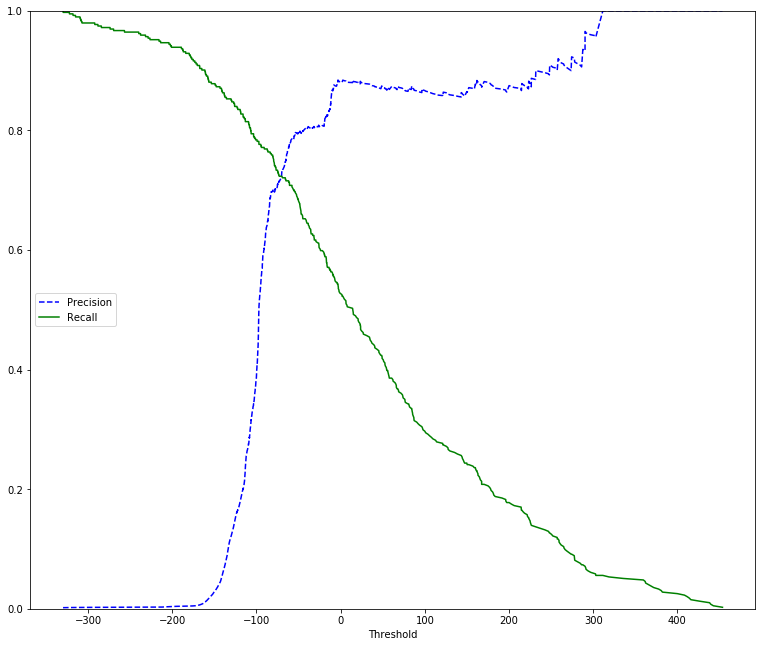

In [30]:
# prepare and plot the ROC curve to visualize the quality of the model

# see page 90, 91
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# use k-fold prediction, reporting the decision functions, for our model
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method='decision_function', n_jobs=-1)



# create the data for the curve plotting
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)



'''
 * function to plot precision vs. recall
'''
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0, 1])
    
    
    
    
# show the curves
plt.rcParams['figure.figsize'] = (13,11)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# And then another classifier

In the cells below, train and evaluate a Random Forest classifier to detect credit card fraud.


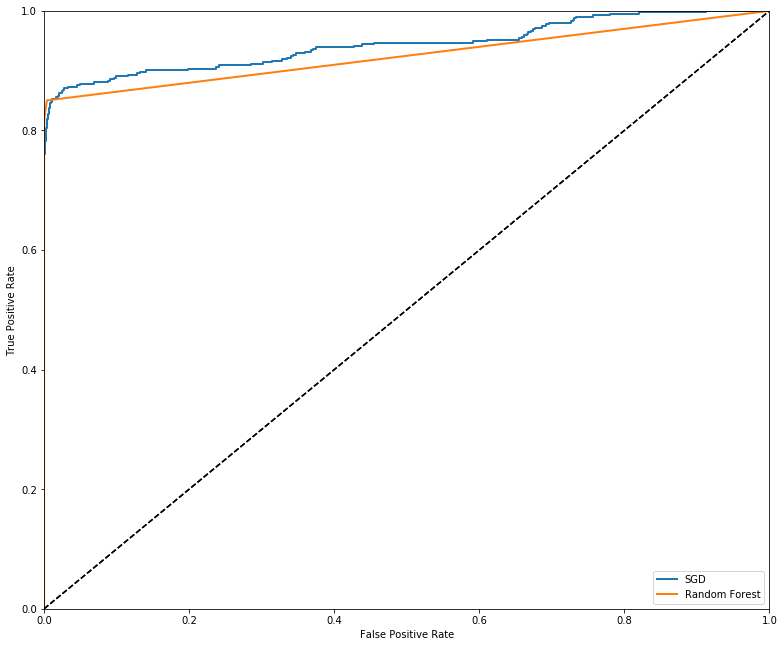

In [31]:
# train the RandomForestClassifier, and then plot it's ROC 
# curve along with the SGD classifier's curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier




'''
 * Function to plot the ROC curve
'''
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')




fpr, tpr, thresholds = roc_curve(y_train, y_scores)


# train a Random Forest Classifier
forest_clf = RandomForestClassifier(random_state=68333, n_jobs=-1)




# A binary RFC returns a list of pairs of probabilities [a, b], 
# where a is the probability an instance is a negative and b 
# is the probability the instance is positive. Gather these 
# pairs via cross-value prediction
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, 
                                    cv=3, method='predict_proba', n_jobs=-1)



# We need one score per instance to do the ROC curve, so we will
# just take the positive probability value from each pair
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_scores_forest)


plt.rcParams['figure.figsize'] = (13,11)    
plot_roc_curve(fpr, tpr, 'SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')


plt.show()

In [32]:
# Now, display the area under the ROC curve for both 
# models

from sklearn.metrics import roc_auc_score
# and, finally, show the area under the ROC curve for both models
print('SGD area under ROC curve:', roc_auc_score(y_train, y_scores))
print('RF area under ROC curve:', roc_auc_score(y_train, y_scores_forest))

SGD area under ROC curve: 0.9434077584669489
RF area under ROC curve: 0.9247482924140498


# Wrapping up

Which of your current models is the best predictor of credit card fraud? Why do you say that? Write your answer below:


I think the RF model is better than the SGD model because from the graph it looks like it's more consistent when it comes to determining TPs and FPs in tandem. The SGD model may be calculating more TPs than FPs most of the time, but from the looks of it, it's much more erratic. Then again, I'm not sure if that matters. I mean you mostly just want as many TPs and FPs as possible, so the SGD model might be better overall. Other than at the beginning of the graph, it never dips under the level of our RF classifier.
